Kaggle always comes with amazing unseen competitons which just blows out your mind. This is my featured competition. At first, after seeing the problem statement, I thought that featured competitons are not for begineers like me because it was not some basic tweet classification problem which we learn from online courses. But then I thought why not to learn some new concepts from other awesome kaggle master's kernels and do some research to get going with the learning process.
So, in this kernal I will be covering following things:
1. Preliminary step
    1.1. Understanding Evalution Metric
    1.2. Importing Required Libraries
    1.3. Reading the Dataset
    
2. Exploratory Data Analysis
    2.1. Descriptive Data Analysis
    2.2. Handling Missing Values
    2.3. Distribution of Sentiments
    2.4. Cleaning the Data

3. Data Visualiazation
    3.1. Comparing number of words in text of Train and Test files
    3.2. Comparing number of words of selected_text and text in Train set
    3.3. Comparing number of punctuation marks in Train and Test files
    3.4. Ngram Analysis
    3.5. Word Cloud
    
4. Model Implementation
    4.1. Prepare Data for the Model
    4.2  Initializing Model
    4.3. Implementing
    4.4. Predicting 

## Objective

Determine the words in the tweet which decide the polarity of the tweet.

## 1. Preliminary Steps

### 1.1. Understanding Evalution Metric 

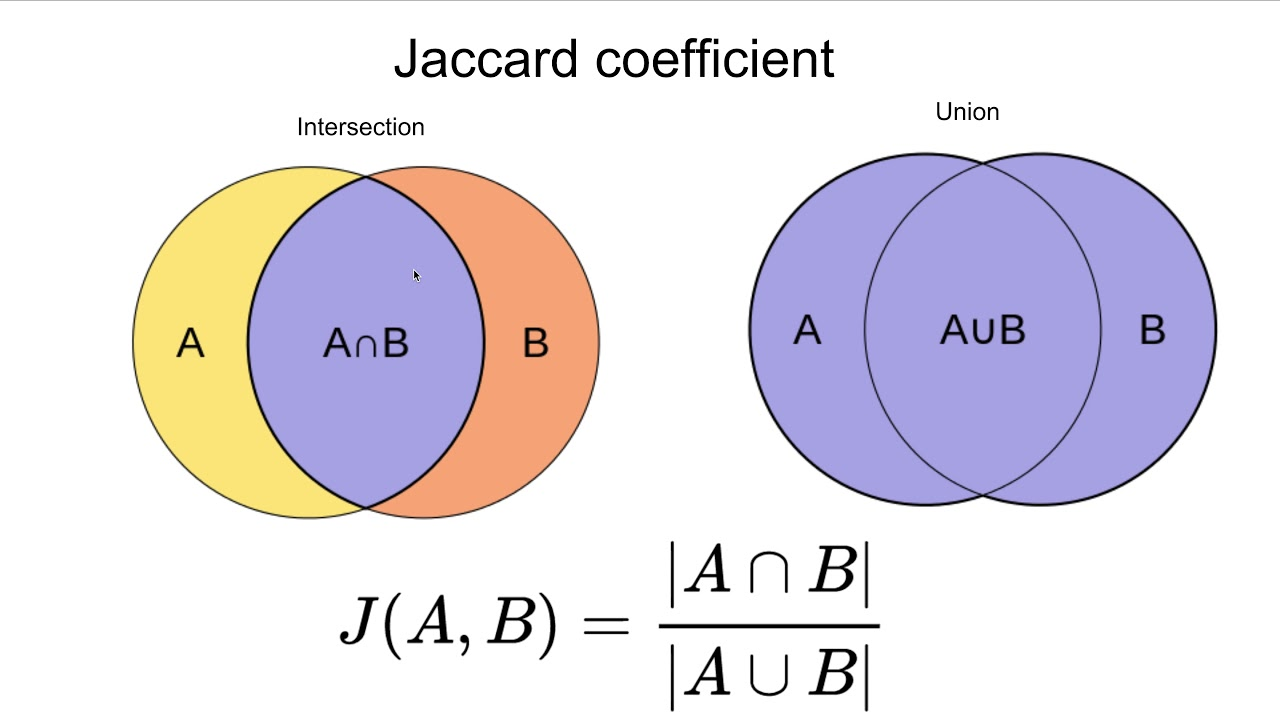
A simple example using set notation: How similar are these two sets?



A = {0,1,2,5,6}
B = {0,2,3,4,5,7,9}
Solution: J(A,B) = |A∩B| / |A∪B| = |{0,2,5}| / |{0,1,2,3,4,5,6,7,9}| = 3/9 = 0.33

In [ ]:
def jaccard(str1, str2): 
    a = set(str1.lower().split()) 
    b = set(str2.lower().split())
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))


Sentence_1 = 'Life well spent is life good'
Sentence_2 = 'Life is an art and it is good so far'
Sentence_3 = 'Life is good'

    
print(jaccard(Sentence_1,Sentence_2))
print(jaccard(Sentence_1,Sentence_3))

As in this competiton it is mandatory to toggle the internet to off position.
So, we need to add the offline data which I used in my notebook:
1. Installing Simple Transformer Package:
    https://www.kaggle.com/jonathanbesomi/simple-transformers-pypi
2. Transformer Distilbert Pre-trained Model:
    https://www.kaggle.com/jonathanbesomi/transformers-pretrained-distilbert

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Installing Simple Transformer

In [ ]:
!pip install '/kaggle/input/simple-transformers-pypi/seqeval-0.0.12-py3-none-any.whl' -q
!pip install '/kaggle/input/simple-transformers-pypi/simpletransformers-0.22.1-py3-none-any.whl' -q

### 1.2. Importing Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
warnings.filterwarnings("ignore")
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS
import tensorflow as tf
import json

### 1.3. Reading the Dataset

In [ ]:
train = pd.read_csv(r'/kaggle/input/tweet-sentiment-extraction/train.csv')
test = pd.read_csv(r'/kaggle/input/tweet-sentiment-extraction/test.csv')
sample_submission = pd.read_csv(r'/kaggle/input/tweet-sentiment-extraction/sample_submission.csv')

## 2. Exploratory Data Analysis 

### 2.1. Descriptive Data Analysis

In [ ]:
print('Train Data Shape:', train.shape)
print('Test Data Shape:', test.shape)

In [ ]:
train.describe()

### 2.2. Handling Missing Values

In [ ]:
train.isnull().sum()

In [ ]:
test.isnull().sum()

Dropping is best option here as there is only on missing value

In [ ]:
train.dropna(inplace = True)

### 2.3. Distribution of Sentiments

In [ ]:
train['sentiment'].value_counts()

In [ ]:
plt.figure(figsize = (13,5))
plt.subplot(121)
plt.title('Distribution of sentiments in Train Data')
sns.countplot(train['sentiment'])
plt.subplot(122)
sns.countplot(test['sentiment'])
plt.title('Distribution of sentiments in Test Data')

### Cleaning the Data

Usually while cleaning data we remove punctuation marks from the text data but not in thus case as selected text contains punctuation marks as well. It's visualization can be seen a few lines below. Another demonstartion for this is:

In [ ]:
train.head(1)

See the word i'd both in text and selected_text column

In [ ]:
def clean_data(data):
    # Removing extra spaces in the beginning of text
    data = data.strip()
    # Lower the Text
    data = data.lower()
    return data

In [ ]:
train['text'] = train['text'].apply(lambda x: clean_data(x))
test['text'] = test['text'].apply(lambda x: clean_data(x))
train['selected_text'] = train['selected_text'].apply(lambda x: clean_data(x))

## 3. Data Visualiazation

### 3.1. Comparing number of words in text of Train and Test files

In [ ]:
train['num_words_text'] = train['text'].str.split().apply(lambda x: len(x))
test['num_words_text'] = test['text'].str.split().apply(lambda x: len(x))
train['num_words_selected_text'] = train['selected_text'].str.split().apply(lambda x: len(x))

In [ ]:
plt.figure(figsize = (15,20))
plt.suptitle('Comparing train and test data based on text word length', fontsize = 22)
plt.subplot(311)
plt.xlabel('Positive Sentiment Text Length', fontsize = 15)
plt.ylabel('Distribution', fontsize = 15)
sns.kdeplot(train[train['sentiment']=='positive']['num_words_text'].values, shade = True, color = 'blue', label = 'train')
sns.kdeplot(test[test['sentiment']=='positive']['num_words_text'].values, shade = True, color = 'red', label = 'train')
plt.subplot(312)
plt.xlabel('Neutral Sentiment Text Length', fontsize = 15)
plt.ylabel('Distribution', fontsize = 15)
sns.kdeplot(train[train['sentiment']=='neutral']['num_words_text'].values, shade = True, color = 'blue', label = 'train')
sns.kdeplot(test[test['sentiment']=='neutral']['num_words_text'].values, shade = True, color = 'red', label = 'train')
plt.subplot(313)
plt.xlabel('Negaitive Sentiment Text Length', fontsize = 15)
plt.ylabel('Distribution', fontsize = 15)
sns.kdeplot(train[train['sentiment']=='negative']['num_words_text'].values, shade = True, color = 'blue', label = 'train')
sns.kdeplot(test[test['sentiment']=='negative']['num_words_text'].values, shade = True, color = 'red', label = 'train')

### 3.2. Comparing number of words of selected_text and text in Train set

In [ ]:
plt.figure(figsize = (15,20))
plt.suptitle('Comparing train text and selected text word length', fontsize = 22)
plt.subplot(311)
plt.xlabel('Positive Sentiment Text Length', fontsize = 15)
plt.ylabel('Positive Sentiment Selected Text Length', fontsize = 15)
sns.kdeplot(train[train['sentiment']=='positive']['num_words_text'].values, shade = True, color = 'blue', label = 'train')
sns.kdeplot(train[train['sentiment']=='positive']['num_words_selected_text'].values, shade = True, color = 'red', label = 'train')
plt.subplot(312)
plt.xlabel('Neutral Sentiment Text Length', fontsize = 15)
plt.ylabel('Neutral Sentiment Selected Text Length', fontsize = 15)
sns.kdeplot(train[train['sentiment']=='neutral']['num_words_text'].values, shade = True, color = 'blue', label = 'train')
sns.kdeplot(train[train['sentiment']=='neutral']['num_words_selected_text'].values, shade = True, color = 'red', label = 'train')
plt.subplot(313)
plt.xlabel('Negaitive Sentiment Text Length', fontsize = 15)
plt.ylabel('Negative Sentiment Selected Text Length', fontsize = 15)
sns.kdeplot(train[train['sentiment']=='negative']['num_words_text'].values, shade = True, color = 'blue', label = 'train')
sns.kdeplot(train[train['sentiment']=='negative']['num_words_selected_text'].values, shade = True, color = 'red', label = 'train')

### 3.3. Comparing number of punctuation marks in Train and Test files

In [ ]:
def punctuation_count(data):
    x = len([w for w in data if w in string.punctuation])
    return x

In [ ]:
train['punct_count_text'] = train['text'].apply(lambda x: punctuation_count(x))
train['punct_count_selected_text'] = train['selected_text'].apply(lambda x: punctuation_count(x))

In [ ]:
plt.figure(figsize = (12,6))
plt.suptitle('Comparing train text and selected text punctuation length', fontsize = 22)
plt.xlabel('Punctuation Count', fontsize = 15)
plt.ylabel('Distribution', fontsize = 15)
sns.kdeplot(train['punct_count_text'].values, shade = True, color = 'blue', label = 'train')
sns.kdeplot(train['punct_count_selected_text'].values, shade = True, color = 'red', label = 'train')

In [ ]:
positive_tweet = train[train['sentiment']=='positive']
negative_tweet = train[train['sentiment']=='negative']
neutral_tweet = train[train['sentiment']=='neutral']

### 3.4. Ngram Analysis

It is most easiest and beautiful way to analyze most frequent words occuring in our Dataset

Ngram Analysis is done using CountVectorizer of Sklearn Library and its documentation can be seen and understood here:
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [ ]:
def get_top_n_words(corpus, ngram_range = (1,1), n = None):
    vec = CountVectorizer(ngram_range = ngram_range, stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis = 0)
    word_freq = [(word, sum_words[0,idx]) for word, idx in vec.vocabulary_.items()]
    word_freq = sorted(word_freq, key = lambda x: x[1], reverse = True)
    return word_freq[:n]

### Unigram Analysis of text column 

In [ ]:
pos_unigram = get_top_n_words(positive_tweet['text'], (1,1), 20)
neutral_unigram = get_top_n_words(neutral_tweet['text'], (1,1), 20)
neg_unigram = get_top_n_words(negative_tweet['text'], (1,1), 20)

df1 = pd.DataFrame(pos_unigram, columns = ['word','count'])
df2 = pd.DataFrame(neutral_unigram, columns = ['word','count'])
df3 = pd.DataFrame(neg_unigram, columns = ['word','count'])

plt.tight_layout()
fig,(ax1,ax2,ax3)=plt.subplots(3,1,figsize=(12,17))
sns.barplot(x = 'count' , y = 'word', data = df1, orient = 'h',ax = ax1)
ax1.set_title('Most repititve words in positive tweets')
ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.grid(False)
sns.barplot(x = 'count' , y = 'word', data = df2, orient = 'h',ax = ax2)
ax2.set_title('Most repititve words in neutral tweets')
ax2.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.grid(False)
sns.barplot(x = 'count' , y = 'word', data = df3, orient = 'h',ax = ax3)
ax3.set_title('Most repititve words in negative tweets')
ax3.spines["right"].set_visible(False)
ax3.spines["top"].set_visible(False)
ax3.grid(False)

### Bigram Analysis of text column 

In [ ]:
pos_bigram = get_top_n_words(positive_tweet['text'], (2,2), 20)
neutral_bigram = get_top_n_words(neutral_tweet['text'], (2,2), 20)
neg_bigram = get_top_n_words(negative_tweet['text'], (2,2), 20)

df1 = pd.DataFrame(pos_bigram, columns = ['word','count'])
df2 = pd.DataFrame(neutral_bigram, columns = ['word','count'])
df3 = pd.DataFrame(neg_bigram, columns = ['word','count'])

plt.tight_layout()
fig,(ax1,ax2,ax3)=plt.subplots(3,1,figsize=(12,17))
sns.barplot(x = 'count' , y = 'word', data = df1, orient = 'h',ax = ax1)
ax1.set_title('Most repititve words in positive tweets')
ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.grid(False)
sns.barplot(x = 'count' , y = 'word', data = df2, orient = 'h',ax = ax2)
ax2.set_title('Most repititve words in neutral tweets')
ax2.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.grid(False)
sns.barplot(x = 'count' , y = 'word', data = df3, orient = 'h',ax = ax3)
ax3.set_title('Most repititve words in negative tweets')
ax3.spines["right"].set_visible(False)
ax3.spines["top"].set_visible(False)
ax3.grid(False)

### Trigram Analysis of text column 

In [ ]:
pos_trigram = get_top_n_words(positive_tweet['text'], (3,3), 20)
neutral_trigram = get_top_n_words(neutral_tweet['text'], (3,3), 20)
neg_trigram = get_top_n_words(negative_tweet['text'], (3,3), 20)

df1 = pd.DataFrame(pos_trigram, columns = ['word','count'])
df2 = pd.DataFrame(neutral_trigram, columns = ['word','count'])
df3 = pd.DataFrame(neg_trigram, columns = ['word','count'])

plt.tight_layout()
fig,(ax1,ax2,ax3)=plt.subplots(3,1,figsize=(12,17))
sns.barplot(x = 'count' , y = 'word', data = df1, orient = 'h',ax = ax1)
ax1.set_title('Most repititve words in positive tweets')
ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.grid(False)
sns.barplot(x = 'count' , y = 'word', data = df2, orient = 'h',ax = ax2)
ax2.set_title('Most repititve words in neutral tweets')
ax2.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.grid(False)
sns.barplot(x = 'count' , y = 'word', data = df3, orient = 'h',ax = ax3)
ax3.set_title('Most repititve words in negative tweets')
ax3.spines["right"].set_visible(False)
ax3.spines["top"].set_visible(False)
ax3.grid(False)

### Unigram Analysis of selected_text column 

In [ ]:
pos_unigram = get_top_n_words(positive_tweet['selected_text'], (1,1), 20)
neutral_unigram = get_top_n_words(neutral_tweet['selected_text'], (1,1), 20)
neg_unigram = get_top_n_words(negative_tweet['selected_text'], (1,1), 20)

df1 = pd.DataFrame(pos_unigram, columns = ['word','count'])
df2 = pd.DataFrame(neutral_unigram, columns = ['word','count'])
df3 = pd.DataFrame(neg_unigram, columns = ['word','count'])

plt.tight_layout()
fig,(ax1,ax2,ax3)=plt.subplots(3,1,figsize=(12,17))
sns.barplot(x = 'count' , y = 'word', data = df1, orient = 'h',ax = ax1)
ax1.set_title('Most repititve words in positive selected_text')
ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.grid(False)
sns.barplot(x = 'count' , y = 'word', data = df2, orient = 'h',ax = ax2)
ax2.set_title('Most repititve words in neutral selected_text')
ax2.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.grid(False)
sns.barplot(x = 'count' , y = 'word', data = df3, orient = 'h',ax = ax3)
ax3.set_title('Most repititve words in negative selected_text')
ax3.spines["right"].set_visible(False)
ax3.spines["top"].set_visible(False)
ax3.grid(False)

### 3.5. Word Cloud Analysis

It is another way to visualize most frequent words in dataset

In [ ]:
stopwords = set(STOPWORDS)
def word_cloud(data, title=None):
    cloud = WordCloud(background_color = 'black',
                     stopwords = stopwords,
                     max_words = 200,
                     max_font_size = 40,
                     scale = 3).generate(str(data))
    fig = plt.figure(figsize=(15,15))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.25)
        plt.imshow(cloud)
        plt.show()

In [ ]:
word_cloud(positive_tweet['text'], 'Most Repeated Words in Positive Text Tweets')

In [ ]:
word_cloud(neutral_tweet['text'], 'Most Repeated Words in Neutral Text Tweets')

In [ ]:
word_cloud(negative_tweet['text'], 'Most Repeated Words in Negative Text Tweets')

## Model Prepration and Implementation

There are numerous ways to deal with this kind of Dataset that I discovered from other kernels and that I implemented in my kernal:
1. **Using the Simple Transformer Attention Model's Question Answering Model which uses SQuAD data for this**:
    and this kernal helped a lot in this: https://www.kaggle.com/jonathanbesomi/question-answering-starter-pack/output
    and it's documentation can be read and understood from here:
    https://github.com/ThilinaRajapakse/simpletransformers#question-answering
   
2. **Another way is using the pre-trained models of BERT, for instance you can look at these kernels:**
    https://www.kaggle.com/cdeotte/tensorflow-roberta-0-705
    https://www.kaggle.com/abhishek/bert-base-uncased-using-pytorch
    
A problem can be solved with different a number of ways - Just find the one you can understand first and then try to learn other on as well as learning is an iterative process.

As you may have read in above mentioned github link that for question answering tasks, the input data can be in JSON files or in a Python list of dicts in the correct format and a specicfic format was given which is mandatory as a model takes a particular format as input.
#### Format attributes: 
Each such dictionary contains two attributes, the "context" and "qas".

**context**: The paragraph or text from which the question is asked.
**qas**: A list of questions and answers.
Questions and answers are represented as dictionaries. Each dictionary in qas has the following format.

**id**: (string) A unique ID for the question. Should be unique across the entire dataset.
**question**: (string) A question.
**is_impossible**: (bool) Indicates whether the question can be answered correctly from the context.
**answers**: (list) The list of correct answers to the question.
A single answer is represented by a dictionary with the following attributes.

**answer**: (string) The answer to the question. Must be a substring of the context.
**answer_start**: (int) Starting index of the answer in the context.

This is the format of data neended as input for this dataset for train Data is:

In [ ]:
train_data = [
    {
        'context': "This tweet sentiment extraction challenge is great",
        'qas': [
            {
                'id': "00001",
                'question': "positive",
                'answers': [
                    {
                        'text': "is great",
                        'answer_start': 43
                    }
                ]
            }
        ]
    }
    ]

So, we need to extract the index from the text from where the selected_text starts as this is required field of the input format.
So, here is the fxn defined for this task and the index of all texts are saved in a list 'l'  

### 4.1. Input Data Prepration for the Model

In [ ]:
l = []
def start_index(text, selected_text):
    start_index = text.find(selected_text)
    l.append(start_index)
    
for i in range(len(train)):
    start_index(train.iloc[i,1], train.iloc[i,2])

#### Converting Train data into specified json Format

In [ ]:
def ques_ans_format_train(train):
    output = []
    for i in range(len(train)):
        context = train.iloc[i,1]
        qas = []
        qid = train.iloc[i,0]
        ques = train.iloc[i,3]
        ans = []
        answer = train.iloc[i,2]
        answer_start = l[i]
        ans.append({'text': answer, 'answer_start': answer_start})
        qas.append({'id': qid, 'question': ques, 'is_impossible': False, 'answers': ans})        
        output.append({'context': context, 'qas': qas})
    return output

train_json_format = ques_ans_format_train(train)
# Save as a JSON file
os.makedirs('data', exist_ok=True)
with open('data/train.json', 'w') as f:
    json.dump(train_json_format, f)
    f.close()

Input Format Required for Test Data is:

In [ ]:
test_data = ([
    {
        'context': "Some context as a demo",
        'qas': [
            {'id': '0', 'question': 'neutral'}
        ]
    }
])

#### Converting Test data into specified json Format

In [ ]:
def ques_ans_format_test(test):
    output = []
    for i in range(len(test)):
        context = test.iloc[i,1]
        qas = []
        qid = test.iloc[i,0]
        ques = test.iloc[i,2]
        qas.append({'id': qid, 'question': ques})
        
        output.append({'context': context, 'qas': qas})
    return output

test_json_format = ques_ans_format_test(test)
# Save as a JSON file
os.makedirs('data', exist_ok=True)
with open('data/test.json', 'w') as f:
    json.dump(test_json_format, f)
    f.close()

### Initializing and Training the Model

In [ ]:
from simpletransformers.question_answering import QuestionAnsweringModel

use_cuda = True 
model_path = '/kaggle/input/transformers-pretrained-distilbert/distilbert-base-uncased-distilled-squad/'

# Create the QuestionAnsweringModel
model = QuestionAnsweringModel('distilbert', 
                               model_path, 
                               args={'reprocess_input_data': True,
                                     'overwrite_output_dir': True,
                                     'learning_rate': 5e-5,
                                     'num_train_epochs': 4,
                                     'max_seq_length': 128,
                                     'doc_stride': 64,
                                     'fp16': False,
                                    },
                              use_cuda=use_cuda)

model.train_model(r'data/train.json')

CUDA is a parallel computing platform and application programming interface model created by Nvidia. It allows software developers and software engineers to use a CUDA-enabled graphics processing unit for general purpose processing. 
For enabling the GPU we used **use_cuda = True** here.....

### Extracting the selected_text from test file

In [ ]:
pred = model.predict(test_json_format)

### Getting the submission file ready !!!

In [ ]:
df = pd.DataFrame.from_dict(pred)

In [ ]:
sample_submission["selected_text"] = df["answer"]
# new_df = sample_submission.merge(test,how="inner",on="textID")
# new_df["selected_text"] = np.where((new_df["sentiment"] == "neutral"),new_df["text"], new_df["selected_text"])
# submission = new_df[["textID", "selected_text"]]
sample_submission.to_csv("submission.csv", index = False)
print("File submitted successfully.")

### DO UPVOTE if you like this kernel ...

As it makes me feel motivated and I will be regularly updating this kernal whenever i get to learn more about the stuff related to this.